In [25]:
import pandas as pd
import numpy as np
dc=pd.read_csv('final_data.csv')
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
#Filtering Total Cholesterol Data
df_ch=dc[dc['PARAM'] == 'TOTAL CHOLESTEROL']
df_ch.head()

,PATIENT_ID,NAME,AGE,GENDER,DATE,VALUE,LOW,HIGH,PARAM,UNIT,ORDE_ID
41,f_47_suchela_srivatsa_,Suchela Srivatsa,47.0,female,25-07-2019,212,50,199,TOTAL CHOLESTEROL,mg/dL,79.0
96,m_38_nischal_vijayadeva,Nischal Vijayadeva,38.0,male,25-07-2019,171,50,199,TOTAL CHOLESTEROL,mg/dL,1226.0
154,m_36_smakam,smakam,36.0,male,25-07-2019,179,50,199,TOTAL CHOLESTEROL,mg/dL,311.0
209,m_35_ashish.sawaye,ashish.sawaye,35.0,male,25-07-2019,223,50,199,TOTAL CHOLESTEROL,mg/dL,7262.0
264,m_40_larulraj,larulraj,40.0,male,25-07-2019,254,50,199,TOTAL CHOLESTEROL,mg/dL,3366.0


In [31]:

df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8061 entries, 94810 to 461955
Data columns (total 11 columns):
PATIENT_ID    8061 non-null object
NAME          8061 non-null object
AGE           8061 non-null float64
GENDER        8061 non-null object
DATE          8061 non-null object
VALUE         8061 non-null float64
LOW           8061 non-null object
HIGH          8061 non-null object
PARAM         8061 non-null object
UNIT          8061 non-null object
ORDE_ID       8061 non-null float64
dtypes: float64(3), object(8)
memory usage: 755.7+ KB


In [9]:
df_ch= df_ch.sort_values(by='AGE', ascending=0)

In [10]:
#Converting Data type to float
convert_dict = {'VALUE': float
               }
df_ch = df_ch.astype(convert_dict)
print(df_ch.dtypes)

PATIENT_ID     object
NAME           object
AGE           float64
GENDER         object
DATE           object
VALUE         float64
LOW            object
HIGH           object
PARAM          object
UNIT           object
ORDE_ID       float64
dtype: object


In [11]:
df_ch.PATIENT_ID.nunique()

8057

In [28]:
df_ch=df_ch.drop_duplicates()
df_ch=df_ch[(df_ch['AGE']!=0)&(df_ch['AGE']<=100)]



In [29]:
#Age wise division


In [88]:
def TC_status(x):
    if x['VALUE'] <=200  :
        return 'NORMAL'
    elif (x['VALUE']<=240)&(x['VALUE']>200)  :
        return 'HIGH'
    else :
        return 'CRITICAL'
    
df_ch['TC_status'] = df_ch.apply(TC_status,axis=1)
df_ch_20=df_ch[df_ch['AGE']<20]
df_ch_30=df_ch[(df_ch['AGE']>=20)&(df_ch['AGE']<30)]
df_ch_40=df_ch[(df_ch['AGE']>=30)&(df_ch['AGE']<40)]
df_ch_50=df_ch[(df_ch['AGE']>=40)&(df_ch['AGE']<50)]
df_ch_51=df_ch[df_ch['AGE']>=50]


In [89]:
df_ch.head()

,PATIENT_ID,NAME,AGE,GENDER,DATE,VALUE,LOW,HIGH,PARAM,UNIT,ORDE_ID,TC_status
141217,f_60_shabnam.dawood,shabnam.dawood,60.0,female,25-07-2019,194.0,50,199,TOTAL CHOLESTEROL,mg/dL,7790.0,NORMAL
955314,m_58_murtaza_beawerwala,Murtaza Beawerwala,58.0,male,25-07-2019,131.0,-,200,TOTAL CHOLESTEROL,mg/dL,17.0,NORMAL
288017,f_56_rashna_cama,Rashna Cama,56.0,female,25-07-2019,157.0,50,199,TOTAL CHOLESTEROL,mg/dL,2710.0,NORMAL
132993,m_56_satya_palaka,Satya Palaka,56.0,male,25-07-2019,159.0,50,199,TOTAL CHOLESTEROL,mg/dL,7958.0,NORMAL
169690,m_56_ajay_ojha,Ajay Ojha,56.0,male,25-07-2019,129.0,50,199,TOTAL CHOLESTEROL,mg/dL,3321.0,NORMAL


Text(0.5, 1, 'age vs TC')

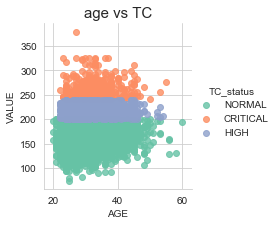

In [99]:
sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_ch, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 3, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('age vs TC', size=15)

#In general the density of the plot decreases as we move to the right(look at the green part) and people tend to have higher cholesterol levels

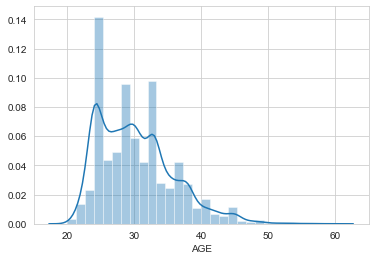

In [91]:
#Checking out the age distribution of the given sample population 
sns.distplot(df_ch.AGE,bins=30)
#AGE DISTRIBUTION OF PEOPLE IS SKEWED.
#gROUPWISE ANALYSIS MIGHT GIVE US BETTER RESULTS

Text(0.5, 1, 'age 50+ vs TC')

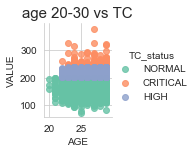

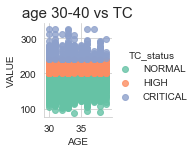

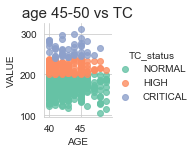

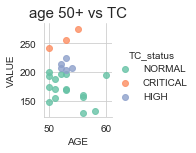

In [100]:

sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_ch_30, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('age 20-30 vs TC', size=15)

sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_ch_40, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('age 30-40 vs TC', size=15)
sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_ch_50, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('age 45-50 vs TC', size=15)
sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_ch_51, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('age 50+ vs TC', size=15)

In [102]:
age23=list(df_ch_30['AGE'])
value23=list(df_ch_30['VALUE'])
age34=list(df_ch_40['AGE'])
value34=list(df_ch_40['VALUE'])
age45=list(df_ch_50['AGE'])
value45=list(df_ch_50['VALUE'])


In [66]:
print(sum(value23)/len(age23))
print(sum(value34)/len(age34))
print(sum(value45)/len(age45))
#Mean values are increasing with age!!
    

175.48667002012073
187.4147232368643
192.02208835341366


In [ ]:
#after checking out the age wise distribution let's explore this data w.r.t gender

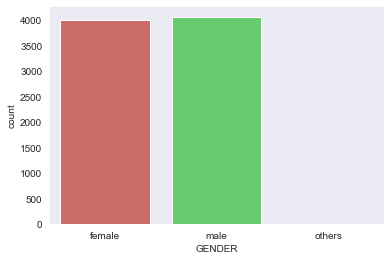

In [67]:
sns.countplot(x='GENDER', data=df_ch, palette='hls')
#w.r.t to gender it is equally distributed


In [68]:
df_male=df_ch[df_ch['GENDER']=='male']
df_female=df_ch[df_ch['GENDER']=='female']

In [75]:

df_ch=df_ch[df_ch['AGE']<100]

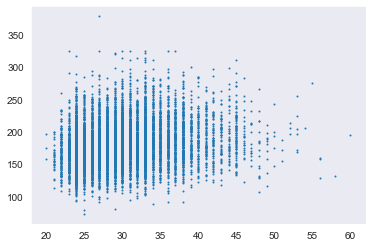

In [74]:
age=list(df_ch['AGE'])
value=list(df_ch['VALUE'])
plt.scatter(age,value,s=1)

In [104]:
df_male=df_ch[df_ch['GENDER']=='male']
df_female=df_ch[df_ch['GENDER']=='female']

Text(0.5, 1, 'FEMALE vs TC')

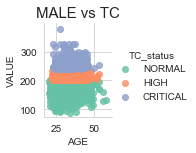

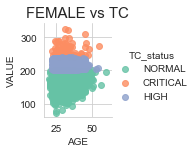

In [106]:
sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_male, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('MALE vs TC', size=15)
sns.set_style('whitegrid')
sns.lmplot( x='AGE', y='VALUE', data=df_female, 
           fit_reg=False, 
           hue='TC_status',
           legend=True, 
           palette='Set2',
           height = 2, 
           aspect = 1
                     )
ax1 = plt.gca()
ax1.set_title('FEMALE vs TC', size=15)

#MALES HAVE A HIGHER RISK OF INCREASED CHOLESTEROL AND THEREFORE HEART DISEASES RISK WHEN COMPARED TO FEMALES 

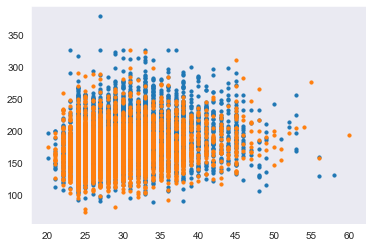

In [79]:
age=list(df_male['AGE'])
value=list(df_male['VALUE'])
plt.scatter(age,value,s=10)
age=list(df_female['AGE'])
value=list(df_female['VALUE'])
plt.scatter(age,value,s=10)
#Females tend to have lower values of Total Cholesterol as compared to Men 

In [114]:
high=df_ch[df_ch['VALUE']>=200]

In [115]:
len(df_ch)

8057

In [116]:
len(high)

2243

In [117]:
print('% of people with high cholesterol =',(len(high)/len(df_ch))*100) 

% of people with high cholesterol = 27.83914608415043


In [118]:
len(df_male)

4056

In [128]:
high_male=df_male[df_male['VALUE']>=200]
high_female=df_female[df_female['VALUE']>=200]

In [129]:
high_male.head()

,PATIENT_ID,NAME,AGE,GENDER,DATE,VALUE,LOW,HIGH,PARAM,UNIT,ORDE_ID,TC_status
98938,m_53_chandrashekar_ps,Chandrashekar PS,53.0,male,25-07-2019,224.0,50,199,TOTAL CHOLESTEROL,mg/dL,6775.0,HIGH
1084,m_53_atar.tomar,atar.tomar,53.0,male,25-07-2019,255.0,50,199,TOTAL CHOLESTEROL,mg/dL,5412.0,CRITICAL
131741,m_52_kilaparthi.sreenivasarao,kilaparthi.sreenivasarao,52.0,male,25-07-2019,206.0,50,199,TOTAL CHOLESTEROL,mg/dL,7566.0,HIGH
37429,m_52_shrikanth.manikarnike,shrikanth.manikarnike,52.0,male,25-07-2019,214.0,50,199,TOTAL CHOLESTEROL,mg/dL,3066.0,HIGH
256749,m_50_ajay_deshpande,Ajay Deshpande,50.0,male,25-07-2019,242.0,50,199,TOTAL CHOLESTEROL,mg/dL,6219.0,CRITICAL


In [130]:
len(high_female)

720

In [131]:
percent_high_female=(len(high_female)/len(df_female))*100

In [132]:
percent_high_female

18.00450112528132

In [133]:
percent_high_male=(len(high_male)/len(df_male))*100

In [134]:
percent_high_male

37.54930966469428

In [139]:
high_female_count= pd.DataFrame(high_female['AGE'],columns=['AGE'])
high_female_count=high_female_count['AGE'].value_counts().to_frame().reset_index().rename(columns={'index':'Age', 'values':'Count'})


In [145]:
high_female_count=high_female_count.rename(columns = {"AGE": "COUNT"})

In [147]:
high_female_count

,Age,COUNT
0,24.0,80
1,33.0,55
2,27.0,52
3,26.0,50
4,25.0,49
5,29.0,49
6,30.0,46
7,31.0,44
8,32.0,44
9,28.0,32


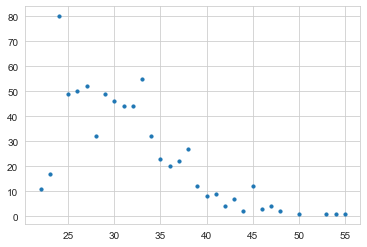

In [149]:
age=list(high_female_count['Age'])
value=list(high_female_count['COUNT'])
plt.scatter(age,value,s=10)


In [150]:
high_male_count= pd.DataFrame(high_male['AGE'],columns=['AGE'])
high_male_count=high_male_count['AGE'].value_counts().to_frame().reset_index().rename(columns={'index':'Age', 'values':'Count'})

In [151]:
high_male_count=high_male_count.rename(columns = {"AGE": "COUNT"})

In [152]:
high_male_count

,Age,COUNT
0,33.0,178
1,30.0,154
2,24.0,100
3,29.0,99
4,31.0,95
5,28.0,92
6,38.0,90
7,34.0,85
8,32.0,74
9,35.0,70


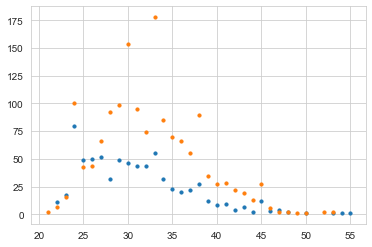

In [153]:
age=list(high_female_count['Age'])
value=list(high_female_count['COUNT'])
plt.scatter(age,value,s=10)
age=list(high_male_count['Age'])
value=list(high_male_count['COUNT'])
plt.scatter(age,value,s=10)


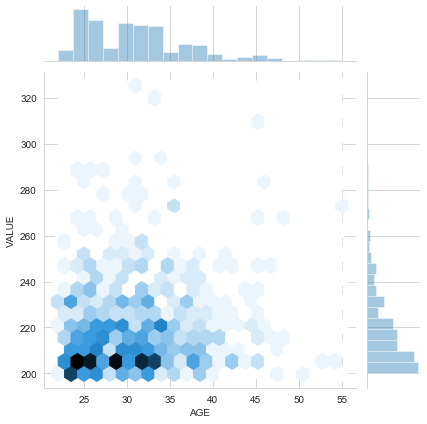

In [159]:
j=sns.jointplot(data=high_female,x='AGE',y='VALUE',kind='hex')
#I kind of liked this plot as it gives us an idea about the clusters which can be formed.
#So we can compare the plot with other bioparameter's plot and find out results which might be insightful.

In [161]:
high= pd.DataFrame(high['AGE'],columns=['AGE'])
high_count=high['AGE'].value_counts().to_frame().reset_index().rename(columns={'index':'Age', 'values':'Count'})


In [162]:
high_count=high_count.rename(columns = {"AGE": "COUNT"})

In [170]:
high_count=high_count[high_count['COUNT']>5]

In [164]:
high= pd.DataFrame(df_ch['AGE'],columns=['AGE'])
age_count=df_ch['AGE'].value_counts().to_frame().reset_index().rename(columns={'index':'Age', 'values':'Count'})

In [172]:
age_count=age_count.rename(columns = {"AGE": "COUNT"})

In [171]:
age_count=age_count[age_count['COUNT']>5]

In [175]:
age_count

,Age,COUNT
0,24.0,992
1,33.0,663
2,30.0,632
3,25.0,531
4,27.0,528
5,29.0,521
6,28.0,505
7,26.0,469
8,31.0,452
9,32.0,388


In [ ]:
#Number of people having high range in a particular age does not give us the exact picture of the data
#Percent values are better indicators, Calculating the percentages , I found out that with age there was a clear relationship between %high people and Age
